# INFO 3402 – Class 09: Ethics of Web Scraping

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT)

## Acknowledgements

This course will draw on resources built by myself and [Allison Morgan](https://allisonmorgan.github.io/) for the [2018 Summer Institute for Computational Social Science](https://github.com/allisonmorgan/sicss_boulder), which were in turn derived from [other resources](https://github.com/simonmunzert/web-scraping-with-r-extended-edition) developed by [Simon Munzert](http://simonmunzert.github.io/) and [Chris Bail](http://www.chrisbail.net/).

The block of code below will only work once you've installed Selenium.

In [1]:
# Lets us talk to servers on the web
import requests

# Parsing HTML magic
from bs4 import BeautifulSoup

# Our interface to a real-life web browser... won't import until you install!
import selenium.webdriver

# For data manipulation
import pandas as pd

# Will be helful for converting between timestamps
from datetime import datetime

# We want to sleep from time-to-time to avoid overwhelming another server
import time

from urllib.parse import quote, unquote
import json

## Installing Selenium

This is a non-trivial process: you will need to (1) install the Python bindings for Selenium, (2) download a web driver to interface with a web browser, and (3) configure Selenium to recognize your web driver. Follow the installation instructions in the documentation [here](https://selenium-python.readthedocs.io/installation.html) (you won't need the Selenium server).

1. Install the Python bindings for Selenium. Go to your Anaconda terminal window, type in this command, and agree to whatever the package manager wants to install or update.

`conda install selenium`

2. Download the driver(s) for the web browser you want to use from the [links on the Selenium documentation](https://selenium-python.readthedocs.io/installation.html). If you use a Chrome browser, download the Chrome driver. Note that the Safari driver will not work on PCs and the Edge driver will not work on Macs. 

3. You will need to unzip the file and move the executable to the same directory where you are running this notebook. Make a note of the path to this directory.

### Using Selenium to control a web browser
The `driver` object we create is a connection from this Python environment out to the browser window.

In [10]:
# Path to the Chrome driver for my PC -- yours is likely very different
# driver = selenium.webdriver.Chrome(executable_path='E:/Dropbox/Courses/2019 Spring - ITSS Web Data Scraping/chromedriver.exe')

# Path to the Chrome driver for my Mac -- yours is likely very different
driver = selenium.webdriver.Chrome(executable_path='/Users/briankeegan/Dropbox/Courses/2019 Spring - ITSS Web Data Scraping/chromedriver')


In [9]:
driver.quit()

This single line of code will open a new browser window and will request the "xkcd" homepage.

Your computer's security protocols may vigorously protest because you are launching a program that is controlled by another process/program. You will need to dismiss these warnings in order to proceed. Whether and how to do that will vary considerably across PCs and Macs, the kinds of permissions your account has on this operating system, and other security measures employed by your computer.

In [11]:
driver.get('https://xkcd.com')

In Classes 01 and 02, we used `BeautifulSoup` to turn HTML and XML into a data structure that we could search and access using Python-like syntax. With Selenium we use a standard called "XPath" to navigate through an HTML document: [this is the official tutorial](https://www.w3schools.com/xml/xpath_syntax.asp) for working with XPath. The syntax is different, but the intuition is similar: we can find a parent node by its attribute (class, id, *etc*.) and then navigate down the tree to its children.

The XPath below has the following elements in sequence
* `//` — Select all nodes that match the selection
* `[@id="middleContainer"]` — find the element that has a "middleContainer" id.
* `/ul[2]` — select the second `<ul>` element underneath the `<div id="middleContainer">`
* `/li[3]` — select the third `<li>` element 
* `/a` — select the a element

The combined XPath string `//*[@id="middleContainer"]/ul[1]/li[3]/a` is like a "file directory" that (hopefully!) points to the hyperlink button that takes us to a random xkcd comic. With the directions to this button, we can have the web browser "click" the "Random" button beneath the comic.

In [6]:
# Let's find the 'random' buttom
element = driver.find_element_by_xpath('//*[@id="middleContainer"]/ul[2]/li[3]/a')

# Once we've found it, now click it
element.click()

We can also get the attributes of different parts of the web page. xkcd is famous for its "hidden messages" inside the image alt-text.

In [7]:
alttext_element = driver.find_element_by_xpath('//*[@id="comic"]/img')
alttext_element.get_attribute("title")

"I don't think the Lakeshore Air Crash Museum really belongs under 'Tourist Attractions.' It's not a museum--it's just an area near the Lake Festival Laser Show where a lot of planes have crashed."

We could write a simple loop to click on the random button five times and print the alt-text from each of those pages.

In [12]:
for c in range(5):
    random_element = driver.find_element_by_xpath('//*[@id="middleContainer"]/ul[2]/li[3]/a')
    random_element.click()
    
    alttext_element = driver.find_element_by_xpath('//*[@id="comic"]/img')
    print('\n',alttext_element.get_attribute("title"))


 Implausible, did you say? Sorry, couldn't quite hear you from all the way up heeeeeeeeere!

 Stay warm, little flappers, and find lots of plant eggs!

 Here at CompanyName.website, our three main strengths are our web-facing chairs, our huge collection of white papers, and the fact that we physically cannot die.

 'But what's the buzz about the film?' 'We're hoping it's distracting.'

 Of course, factions immediately sprang up in favor of '~*~sTaR tReK iNtO dArKnEsS~*~', 'xX_StAr TrEk InTo DaRkNess_Xx', and 'Star Trek lnto Darkness' (that's a lowercase 'L').


When you're done playing with your programmable web browser, make sure to close it.

In [13]:
driver.quit()

Note that with the connection to the web browser closed, any of the functions like `find_element_by_xpath`, `click()`, *etc*. will not work.

In [14]:
alttext_element = driver.find_element_by_xpath('//*[@id="comic"]/img')
alttext_element.get_attribute("title")

MaxRetryError: HTTPConnectionPool(host='127.0.0.1', port=52329): Max retries exceeded with url: /session/3aa8bcde8a5119fab217a55236dfaae5/element (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x11a5dab00>: Failed to establish a new connection: [Errno 61] Connection refused',))

### Exercises

Start your driver again and get the xkcd homepage.

1. Change the XPath to click on the "Prev" button above the comic.
2. Change the XPath to search for the "comicNav" class instead of the "middleContainer" id.
3. Change the XPath to click on the "About" button in the upper-left.

## Screen-scraping a Twitter ego network with Selenium

I am adapting a [tutorial by Shawn Wang](https://dev.to/swyx/scraping-my-twitter-social-graph-with-python-and-selenium--hn8) on scraping a Twitter graph with Python and Selenium.

In [15]:
# Path to the Chrome driver for my PC -- yours is likely very different
# driver = selenium.webdriver.Chrome(executable_path='E:/Dropbox/Courses/2019 Spring - ITSS Web Data Scraping/chromedriver.exe')

# Path to the Chrome driver for my Mac -- yours is likely very different
driver = selenium.webdriver.Chrome(executable_path='/Users/briankeegan/Dropbox/Courses/2019 Spring - ITSS Web Data Scraping/chromedriver')

driver.get('https://www.twitter.com')

Manually log in to your Twitter account through the driver page.

Then go to the "followings" (or followees, also called "friends" in the Twitter API) of an account. 

In [17]:
driver.get('https://twitter.com/realDonaldTrump/following')

At the time of this Notebook's writing, the "realDonaldTrump" account followed 45 other accounts. Depending on the resolution of your display, size of the window, *etc*. there may only be 10–20 accounts visible. We can scroll to see the rest of these accounts programatically.

Run this cell a few times to keep scrolling to the bottom.

In [20]:
driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')

Pass the HTML of the web page in the browser back to Python and turn it into soup.

In [21]:
raw = driver.page_source.encode('utf-8')

soup = BeautifulSoup(raw)

The information about each follower lives inside a `<div "data-item-type":"user">` element.

In [22]:
user_divs = soup.body.find_all('div', attrs={'data-item-type':'user'})

Where does the Twitter account handle live in the HTTP document?

In [23]:
user_divs[0].div['data-screen-name']

'VP'

Where does the name of the Twitter account live in the HTTP document?

In [24]:
user_divs[0].find_all('a',{'class':'fullname'})[0].text.strip()

'Vice President Mike Pence'

Where does the bio live in the HTTP document?

In [25]:
user_divs[0].p.text

'Vice President Mike Pence. Husband, father, & honored to serve as the 48th Vice President of the United States. Tweets may be archived: http://wh.gov/privacy\xa0'

Put all the pieces together now: loop through each `user_div` and pull out the relevant information to store as a list of dictionaries.

In [26]:
# Create an empty list to store the followings data
following_graph_alters = []

# Loop through each user_div
for ud in user_divs:
    
    # Create an empty alter dictionary to fill with the handle, name, bio for each user
    alter = {}
    
    # Get the formal account handle
    alter['Screen Name'] = ud.div['data-screen-name']
    
    # Get the displayed name
    alter['Display Name'] = ud.find_all('a',{'class':'fullname'})[0].text.strip()
    
    # Get the biography
    alter['Bio'] = ud.p.text
    
    # Add the alter to the list
    following_graph_alters.append(alter)
    
# Turn the list into a DataFrame
following_graph_df = pd.DataFrame(following_graph_alters)

# Inspect the DataFrame
following_graph_df

,Bio,Display Name,Screen Name
0,"Vice President Mike Pence. Husband, father, & ...",Vice President Mike Pence,VP
1,"@GOP Chairwoman | Wife, mother of two",Ronna McDaniel,GOPChairwoman
2,Campaign Manager for @realdonaldtrump 2020 Pre...,Brad Parscale,parscale
3,@WhiteHouse Press Secretary. Proudly represent...,Sarah Sanders,PressSec
4,"Host of ""Tucker Carlson Tonight"", weeknights a...",Tucker Carlson,TuckerCarlson
5,Co-Host of @TheFive & Host of @WattersWorld on...,Jesse Watters,JesseBWatters
6,Welcome to @WhiteHouse! Follow for the latest ...,The White House,WhiteHouse
7,"Assistant to President @realDonaldTrump, Direc...",Dan Scavino Jr.,Scavino45
8,Mom. Patriot. Catholic. Counselor.,Kellyanne Conway,KellyannePolls
9,President @MichaelBestLaw; Exclusive Speaker @...,Reince Priebus,Reince


## Screen-scraping a Twitter account's timeline of tweets

In [30]:
driver.get('https://twitter.com/WhiteHouse')

In [28]:
raw = driver.page_source.encode('utf-8')

soup = BeautifulSoup(raw)

In [29]:
tweets = soup.find_all('div',{'class':'tweet'})
len(tweets)

21

Now scroll to the bottom of the page, get the source again, parse out the tweets, and count them. On the browser, window size, resolution, *etc*. I'm using, I got 20 more tweets with a single scroll.

In [31]:
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

In [32]:
raw = driver.page_source.encode('utf-8')
soup = BeautifulSoup(raw)
tweets = soup.find_all('div',{'class':'original-tweet'})
len(tweets)

40

In [33]:
# Screen name
tweets[0]['data-screen-name']

'WhiteHouse'

In [34]:
# Display Name
tweets[0]['data-name']

'The White House'

In [ ]:
# Tweet ID
tweets[0]['data-tweet-id']

In [35]:
# Timestamp
tweets[0].find('a',{'class':'tweet-timestamp'}).span['data-time']

'1549299185'

This is a UNIX time code, also known as the "UNIX epoch", or the number of seconds since midnight on January 1, 1970. Because it is a common way to store data, `datetime` provides a way to convert it into a meaningful timestamp: `utcfromtimestamp`.

In [36]:
print(datetime.utcfromtimestamp(1549143559))

2019-02-02 21:39:19


In [37]:
# Text of the tweet
tweets[0].find('div',{'class':'js-tweet-text-container'}).text.strip()

'Want to be among the first to know who the special guests will be at this year’s #SOTU? Sign up for 1600 Daily!http://45.wh.gov/gfqVNw'

In [38]:
# Replies
tweets[0].find_all('span',{'class':'ProfileTweet-actionCount'})[0]['data-tweet-stat-count']

'915'

In [39]:
# Retweets
tweets[0].find_all('span',{'class':'ProfileTweet-actionCount'})[1]['data-tweet-stat-count']

'901'

In [40]:
# Favorites
tweets[0].find_all('span',{'class':'ProfileTweet-actionCount'})[2]['data-tweet-stat-count']

'3028'

Write a function that extracts all this information from each tweet.

In [41]:
def tweet_timeline_parser(tweet):
    payload = {}
    
    payload['Screen name'] = tweet['data-screen-name']
    payload["Display name"] = tweet['data-name']
    payload['TweetID'] = tweet['data-tweet-id']
    payload['Timestamp'] = tweet.find('a',{'class':'tweet-timestamp'}).span['data-time']
    payload['Text'] = tweet.find('div',{'class':'js-tweet-text-container'}).text.strip()
    payload['Replies'] = int(tweet.find_all('span',{'class':'ProfileTweet-actionCount'})[0]['data-tweet-stat-count'])
    payload['Retweets'] = int(tweet.find_all('span',{'class':'ProfileTweet-actionCount'})[1]['data-tweet-stat-count'])
    payload['Favorites'] = int(tweet.find_all('span',{'class':'ProfileTweet-actionCount'})[2]['data-tweet-stat-count'])
    
    return payload

Loop through all the tweets.

In [42]:
parsed_tweets = []

for tweet in tweets:
    parsed_tweet = tweet_timeline_parser(tweet)
    parsed_tweets.append(parsed_tweet)

Look at the first three tweets that we parsed from the HTML.

In [43]:
parsed_tweets[:3]

[{'Screen name': 'WhiteHouse',
  'Display name': 'The White House',
  'TweetID': '1092466082550566917',
  'Timestamp': '1549299185',
  'Text': 'Want to be among the first to know who the special guests will be at this year’s #SOTU? Sign up for 1600 Daily!http://45.wh.gov/gfqVNw',
  'Replies': 915,
  'Retweets': 901,
  'Favorites': 3028},
 {'Screen name': 'WhiteHouse',
  'Display name': 'The White House',
  'TweetID': '1092182001384329217',
  'Timestamp': '1549231455',
  'Text': 'A few weeks ago, President Trump participated in a naturalization ceremony for 5 of our newest American citizens!pic.twitter.com/7E8CjXtSsj',
  'Replies': 918,
  'Retweets': 3224,
  'Favorites': 14766},
 {'Screen name': 'WhiteHouse',
  'Display name': 'The White House',
  'TweetID': '1092142683261493249',
  'Timestamp': '1549222081',
  'Text': '“Business owners and executives plan to benefit from the 2017 tax cut for a second year and nearly 8-in-10 plan to add more jobs." \n\nGreat news! http://45.wh.gov/sKMHb

There are this many tweets on the account.

In [44]:
tweet_count = soup.find('a',{'class':'ProfileNav-stat'}).find_all('span')[-1]['data-count']
tweet_count

'6701'

Doing some rough math, 6696 divided by 20 tweets per scroll means we need to do 335 scrolls to get the whole timeline.

In [45]:
int(tweet_count)/20

335.05

Let's start with 10 scrolls and see whether things are still working.

In [46]:
for scroll in range(10):
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(1)

Pull in the data and parse out the tweets.

In [47]:
# Get the data from the browser
raw = driver.page_source.encode('utf-8')

# Soup-ify
soup = BeautifulSoup(raw)

# Find all the tweets
tweets = soup.find_all('div',{'class':'original-tweet'})

# Create the container
parsed_tweets = []

# Try to parse the tweets
for tweet in tweets:
    parsed_tweet = tweet_timeline_parser(tweet)
    parsed_tweets.append(parsed_tweet)

How many tweets were parsed out after 10 scrolls?

In [48]:
len(parsed_tweets)

240

We could try to scroll until we can't, logging how many scrolls we went.

In [49]:
# Go to the webpage
driver.get('https://twitter.com/WhiteHouse')

# Initialize the scroll counter and current page height
scroll_counter = 0
last_height = driver.execute_script('return document.body.scrollHeight')

# Start a loop
while True:
    
    # Print out our progress every 10th scroll
    if scroll_counter > 0 and scroll_counter % 10 == 0:
        print("This is scroll: {0}".format(scroll_counter))
    
    # Sleep for 2 seconds in between scrolls
    time.sleep(2)
    
    # Get the current height of the page
    current_height = driver.execute_script('return document.body.scrollHeight')
    
    # If the current page height is the same as the previous page height, we can't scroll anymore
    if current_height == last_height:
        break
    
    # Scroll to the bottom again
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    # Increment our scroll counter
    scroll_counter += 1
    
    # Update the height of the page
    last_height = current_height

This is scroll: 10
This is scroll: 20
This is scroll: 30
This is scroll: 40


We can still parse the data.

In [50]:
# Get the data from the browser
raw = driver.page_source.encode('utf-8')

# Soup-ify
soup = BeautifulSoup(raw)

# Find all the tweets
tweets = soup.find_all('div',{'class':'original-tweet'})

# Create the container
parsed_tweets = []

# Try to parse the tweets
for tweet in tweets:
    parsed_tweet = tweet_timeline_parser(tweet)
    parsed_tweets.append(parsed_tweet)
    
print(len(parsed_tweets))

836


In [52]:
len(raw)

11442195

We can turn our `parsed_tweets` into a DataFrame for saving to CSV or doing visualization, *etc*.

In [53]:
pd.DataFrame(parsed_tweets).head()

,Display name,Favorites,Replies,Retweets,Screen name,Text,Timestamp,TweetID
0,The White House,3069,927,911,WhiteHouse,Want to be among the first to know who the spe...,1549299185,1092466082550566917
1,The White House,14777,920,3226,WhiteHouse,"A few weeks ago, President Trump participated ...",1549231455,1092182001384329217
2,The White House,2563,491,738,WhiteHouse,“Business owners and executives plan to benefi...,1549222081,1092142683261493249
3,The White House,3071,410,831,WhiteHouse,“Banks and smaller companies propelled stocks ...,1549216381,1092118777695748096
4,The White House,5311,776,1597,WhiteHouse,"304,000 new jobs last month. Worker wage gains...",1549208701,1092086565373919232


## Ethics of web scraping

Scrolling through a timeline and parsing the tweets Twitter serves up—until it doesn't—has many good faith assumptions as a model of data scraping that runs afoul of the language in Twitter's Terms of Service: if I am willing to interface like a human user, then when Twitter limits a human user we also stop collecting data.

But we really want all 6,700 of those White House tweets, not just the most recent 831. We are going to use Twitter's search functionality against itself to accomplish this. 

This *significantly* escalates the burden of proof on the researcher to demonstrate that this violation of Twitter's Terms of Service is ethical. In this specific case, I will argue that violating Twitter's Terms of Service can be justified by the greater importance of being able to build an archive of public statements by government officials that are not otherwise available. However, using this approach to scrape private users' timeline would raise significant ethical concerns about violating a platform's Terms of Service and users' reasonable expectations about privacy and the availability of their data.

### Screen scraping

We can use Twitter's search functionality to find all the tweet from an account since or until a date and scroll to get all the data. In practice, you can only get up to approximately 9,999 tweets with this approach. 

First, we'll make a `query_params` dictionary with the name of the account, a start date, and a stop date. Here's we will only do the WhiteHouse tweets from the first year of the Trump administration.

In [54]:
# Make the query params
query_params = {}
query_params['from'] = 'WhiteHouse'
query_params['since'] = '2017-01-20'
query_params['until'] = '2018-01-20'

# Pass the params into a string and quote to format it properly
query_params_quoted = quote("from:{from} since:{since} until:{until}".format(**query_params))

# Add the quoted query params into the URL
query_url = "https://twitter.com/search?f=tweets&q={0}&src=typd".format(query_params_quoted)

print(query_url)

https://twitter.com/search?f=tweets&q=from%3AWhiteHouse%20since%3A2017-01-20%20until%3A2018-01-20&src=typd


Then we load the page and scroll to the bottom, preserving the logging functionality to keep track of how far along we are and when problems occur.

In [56]:
# Load the web page from the URL
driver.get(query_url)

# Repeat the scrolling until the end
scroll_counter = 0
last_height = driver.execute_script('return document.body.scrollHeight')

while True:
    if scroll_counter > 0 and scroll_counter % 10 == 0:
        print("This is scroll: {0}".format(scroll_counter))
    
    time.sleep(2)
    
    current_height = driver.execute_script('return document.body.scrollHeight')
    
    if current_height == last_height:
        break
    
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    
    scroll_counter += 1
    last_height = current_height
    
print("It took {:,} scrolls to reach the end.".format(scroll_counter))

This is scroll: 10
This is scroll: 20
This is scroll: 30
This is scroll: 40
This is scroll: 50
This is scroll: 60
This is scroll: 70
This is scroll: 80
It took 83 scrolls to reach the end.


Once we've finished scrolling to load all the data, we can parse it. This may take a while; the `raw` HTML code after all that scrolling is close to 20 million characters long.

In [57]:
# Get the source after scrolling and soup-ify
raw = driver.page_source.encode('utf-8')
print("There are {0:,} characters in the raw HTML.".format(len(raw)))

soup = BeautifulSoup(raw)

# Find all the tweets
tweets = soup.find_all('div',{'class':'original-tweet'})

# Create the container
parsed_tweets = []

# Try to parse the tweets
for tweet in tweets:
    parsed_tweet = tweet_timeline_parser(tweet)
    parsed_tweets.append(parsed_tweet)
    
print("There are {0:,} parsed tweets.".format(len(parsed_tweets)))

There are 19,781,492 characters in the raw HTML.
There are 1,654 parsed tweets.


Turn the tweets into a DataFrame for analysis.

In [58]:
historical_tweets_df = pd.DataFrame(parsed_tweets)

# Replace the UTC timestamp with a more usable timestamp
historical_tweets_df['Timestamp'] = historical_tweets_df['Timestamp'].apply(lambda x:datetime.utcfromtimestamp(int(x)))

# Inspect
historical_tweets_df.head()


,Display name,Favorites,Replies,Retweets,Screen name,Text,Timestamp,TweetID
0,The White House,2799,202,737,WhiteHouse,"In 1973, Nellie Gray left her job as an attorn...",2018-01-19 23:46:02,954500228195012608
1,The White House,1292,97,388,WhiteHouse,Statement by the President on FISA Amendments ...,2018-01-19 22:41:01,954483863237128192
2,The White House,2185,419,518,WhiteHouse,"Earlier today in the Rose Garden, President Tr...",2018-01-19 21:47:03,954470284697927681
3,The White House,3093,800,755,WhiteHouse,President Trump is standing up for the sanctit...,2018-01-19 19:27:04,954435055732056064
4,The White House,4632,639,1395,WhiteHouse,"President Trump Proclaims January 22, 2018, as...",2018-01-19 19:10:06,954430785469206529


Make a basic scatterplot of the relationship between replies and retweets. By ocular inspection, there is a pretty strong correlation between the number of retweets and replies.

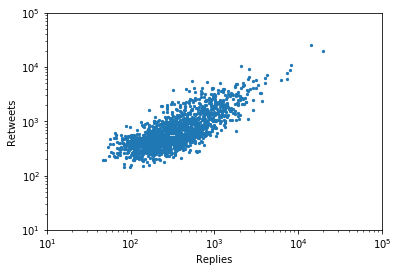

In [60]:
ax = historical_tweets_df.plot(x='Replies',y='Retweets',kind='scatter',logx=True,logy=True,s=5)
ax.set_xlim((1e1,1e5))
ax.set_ylim((1e1,1e5));

### Spoofing headers

When we use `requests` to get data from other web servers, each of the get requests carries some meta-data about ourselves, called [headers](https://www.w3.org/Protocols/rfc2616/rfc2616-sec14.html). These headers tell the server what kind of web browser we are, what kinds of data we can receive, *etc*. so that the server can reply with properly-formatted information. 

But it is also possible for the server to understand a request and refuse to fulfill it, known as a [HTTP 403 error](https://en.wikipedia.org/wiki/HTTP_403). A server's refusal to fulfill a client's request can often be traced back to the identity a client presents through its headers or a client lacking authorization to access the data (*i.e.*, you need to authenticate with the website first). In the case of `requests`, its `get` request includes default header information that identifies it as a Python script rather than a human-driven web browser.

Let's make a request for an article from the NYTimes.

In [61]:
honest_response = requests.get('https://www.nytimes.com/2019/02/03/us/politics/trump-interview-mueller.html')

We can see the headers we sent with this request.

In [62]:
honest_response.request.headers

{'User-Agent': 'python-requests/2.21.0', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

Specifically, the 'User-Agent' string identifies this request as originating from the "python-requests/2.21.0" program, rather than a typical web browser. Some web servers will be configured to inspect the headers of incoming requests and refuse requests unless they are actual web browsers.

We can often circumvent these filters by sending alternative headers that claim to be from a web browser as a part of our `requests.get()`.

In [63]:
# Make a dictionary with spoofed headers for the User-Agent
spoofed_headers = {'User-Agent':"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}

# Make the request with the 
nytimes_url = 'https://www.nytimes.com/2019/02/03/us/politics/trump-interview-mueller.html'
spoofed_response = requests.get(nytimes_url,headers=spoofed_headers)

Sure enough, the get request we sent to the NYTimes web server now includes the spoofed "User-Agent" string we wrote that claims our request is from a web browser. The server should now return the data we requested, even though we are not who we claimed to be.

In [64]:
spoofed_response.request.headers

{'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}

I had trouble finding a website that refused "python-requests" connections automatically (*e.g.*, Amazon, NYTimes, etc.), but you will likely find some along the way. 

Spoofing headers to conceal the identity of your client to a web server is another example of how technological capabilities can overtake ethical responsibilities. The owners of a web server may have good reasons for refusing to serve content to non-web browsers (copyright, privacy, business model, *etc*.). Misrepresenting your identity to extract this data should only be done if the risks to others are small, the benefits are in the public interest, there are no other alternatives for obtaining the data, *etc*. 

There can be *very* real consequences for spoofing headers. Because it is such a common and relatively trivial method for circumventing server security settings, making repeated spoofed requests could result in your IP address or an IP address range (worst case, the entire university) being blocked from making requests to the server.

### Parallelizing requests

A third web scraping practice that warrants ethical scrutiny is parallelization. In the example of getting historical WhiteHouse tweets, we launched a single browser window and "scrolled" until we reached the end; a process that took on the order of a minute.

However, we *could* launch multiple scripts that each creates a browser windows and collect different segments of the data in parallel for us to combine the results at the end. In an API context, we *could* create multiple applications and design our requests so that each works simultaneously to get all the data. 

Each request imposes some cost on the server to receive, process, and return the requested data: making these requests in parallel increases the convenience and efficiency for the data scraper, but also dramatically increases the strain on the server to fulfill other clients' requests. In fact, highly-parallelized and synchronized requests can look like [denial-of-service attacks](https://en.wikipedia.org/wiki/Denial-of-service_attack) and may get your requests far more scrutiny and blowback than patiently waiting for your data to arrive in series. The ethical justifications for employing highly-parallelized scraping approaches are thin: documenting a rapidly-unfolding event before the data disappears, for example.

In [65]:
driver.quit()